# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [67]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, how='inner', on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [48]:
# Checking the number of mice.
num_mice = combined_data["Mouse ID"].nunique()
num_mice

249

In [49]:
# Our data should be uniquely identified by Mouse ID and Timepoint
is_unique = not combined_data.duplicated(subset=["Mouse ID", "Timepoint"]).any()
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"])]["Mouse ID"].unique()

if is_unique:
    print("Data is uniquely identified by Mouse ID and Timepoint.")
else:
    print("Data is not uniquely identified by Mouse ID and Timepoint. There are duplicates.")
    print("Duplicate Mouse IDs by Mouse ID and Timepoint:")
    print(duplicate_mice)


Data is not uniquely identified by Mouse ID and Timepoint. There are duplicates.
Duplicate Mouse IDs by Mouse ID and Timepoint:
['g989']


In [50]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id = "g989"
#extract all data for duplicte mouse ID
duplicate_mouse_data = combined_data[combined_data["Mouse ID"] == duplicate_mouse_id]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [51]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data["Mouse ID"] != "g989"]
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [52]:
# Checking the number of mice in the clean DataFrame.
num_mice_in_clean_data = clean_data["Mouse ID"].nunique()
num_mice_in_clean_data 

248

## Summary Statistics

In [53]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_group = clean_data.groupby('Drug Regimen')
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_volume_mean = regimen_group['Tumor Volume (mm3)'].mean()
tumor_volume_median = regimen_group['Tumor Volume (mm3)'].median()
tumor_volume_variance = regimen_group['Tumor Volume (mm3)'].var()
tumor_volume_std = regimen_group['Tumor Volume (mm3)'].std()
tumor_volume_sem = regimen_group['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary DataFrame.

summary_statistics = pd.DataFrame({
    'Mean Tumor Volume': tumor_volume_mean,
    'Median Tumor Volume': tumor_volume_median,
    'Tumor Volume Variance': tumor_volume_variance,
    'Tumor Volume Std. Dev.': tumor_volume_std,
    'Tumor Volume SEM': tumor_volume_sem
})

summary_statistics.head()



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [54]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_statistics

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

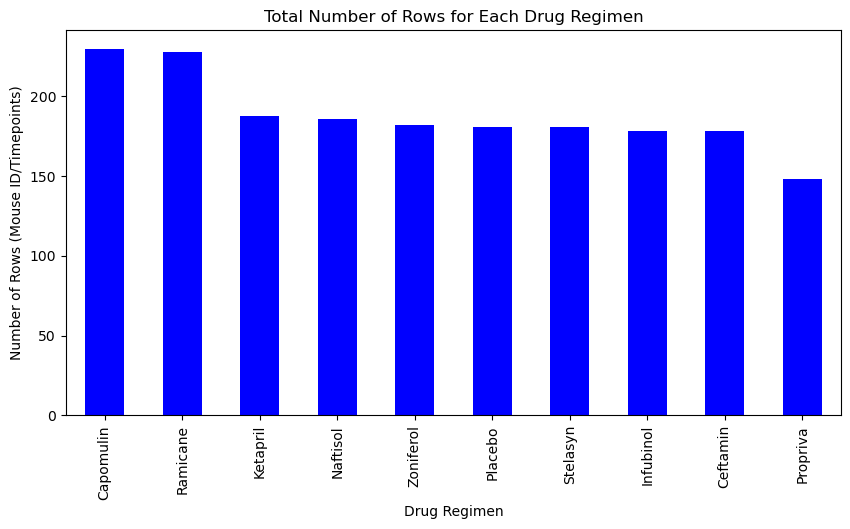

In [55]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_data['Drug Regimen'].value_counts()
#Bar plot 
regimen_counts.plot(kind='bar', figsize=(10, 5), color='blue')

#Lables 
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows (Mouse ID/Timepoints)')
plt.title('Total Number of Rows for Each Drug Regimen')

#display plot bar 
plt.show()

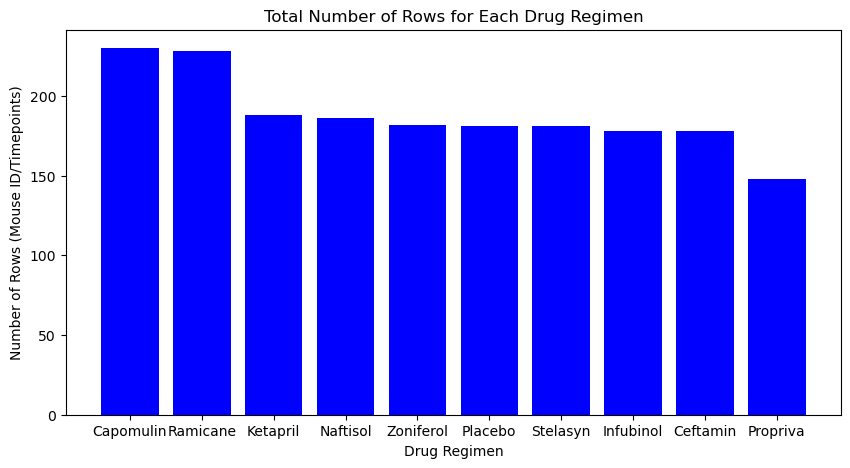

In [56]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimens = regimen_counts.index
counts = regimen_counts.values

#bar plot 
plt.figure(figsize=(10, 5))
plt.bar(drug_regimens, counts, color='blue')

#Labels
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows (Mouse ID/Timepoints)')
plt.title('Total Number of Rows for Each Drug Regimen')

#Disply the plot 
plt.show()

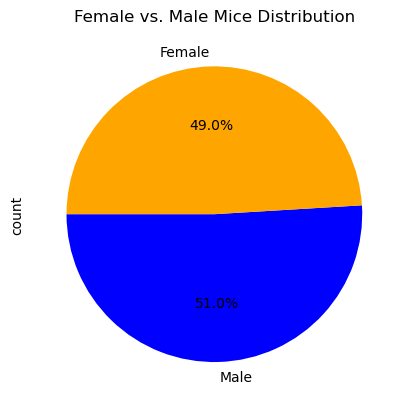

<Figure size 400x400 with 0 Axes>

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_distribution = clean_data['Sex'].value_counts()

#Pie plot
sex_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'], startangle=180)
plt.title('Female vs. Male Mice Distribution')
plt.figure(figsize=(4, 4))

#display pie chart
plt.show()

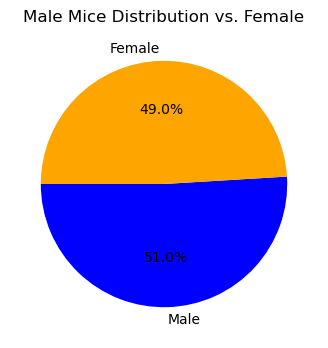

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_distribution = clean_data['Sex'].value_counts()

categories = sex_distribution.index
counts = sex_distribution

#Pie plot 
plt.figure(figsize=(4, 4))
plt.pie(counts, labels=categories, autopct='%1.1f%%', colors=['blue', 'orange'], startangle=180)
#plt.title('Female vs. Male Mice Distribution')
plt.title('Male Mice Distribution vs. Female')


#Display pie chart
plt.axis()
plt.show()

## Quartiles, Outliers and Boxplots

In [59]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = clean_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint_df, clean_data, on=['Mouse ID', 'Timepoint'], how='inner')

In [60]:
# Create a list of treatment regimens for the loop
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to store potential outliers
potential_outliers = []

# Loop through each treatment regimen
for regimen in treatment_regimens:
    # Locate the rows which contain mice on the current regimen and get the tumor volumes
    regimen_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == regimen]['Tumor Volume (mm3)']
    
    # Calculate the IQR for the current regimen
    quartiles = regimen_data.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Calculate the lower and upper bounds for potential outliers
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    # Locate potential outliers for the current regimen
    outliers = regimen_data[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    
    # Add the subset of potential outliers to the list
    potential_outliers.append(outliers)

    # Display the results for the current regimen
    print(f"{regimen}'s potential outliers: {outliers}")

# Display the list of potential outliers for each regimen
print(potential_outliers)

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
[Series([], Name: Tumor Volume (mm3), dtype: float64), Series([], Name: Tumor Volume (mm3), dtype: float64), 31    36.321346
Name: Tumor Volume (mm3), dtype: float64, Series([], Name: Tumor Volume (mm3), dtype: float64)]


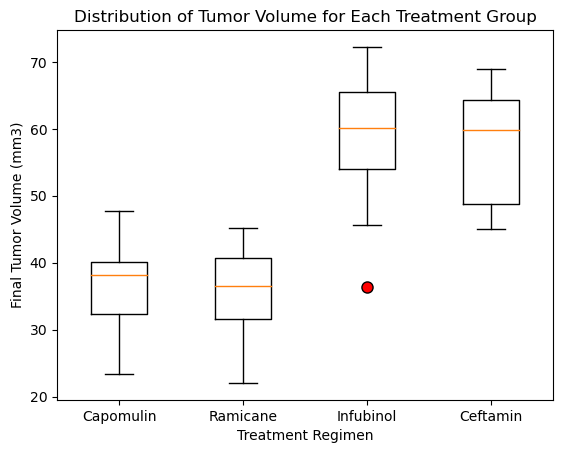

In [61]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_vol_data = [final_tumor_volume[final_tumor_volume['Drug Regimen'] == regimen]['Tumor Volume (mm3)'] 
                  for regimen in treatment_regimens]

red_point = dict(markerfacecolor='red', markersize=8)
plt.boxplot(tumor_vol_data, labels=treatment_regimens, flierprops=red_point)
plt.xlabel('Treatment Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')

plt.show()

## Line and Scatter Plots

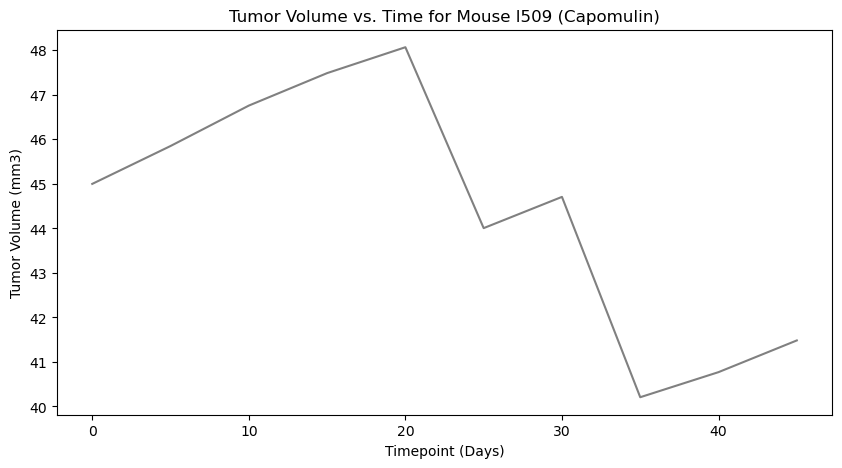

In [62]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
selected_mouse_id = 'l509'

# Filter the data for the selected mouse and Capomulin regimen
selected_mouse_data = clean_data[(clean_data['Mouse ID'] == selected_mouse_id) & (clean_data['Drug Regimen'] == 'Capomulin')]

# Create the line plot
plt.figure(figsize=(10, 5))
plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'], marker='', color='gray', linestyle='-')
plt.title(f'Tumor Volume vs. Time for Mouse {selected_mouse_id} (Capomulin)')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()

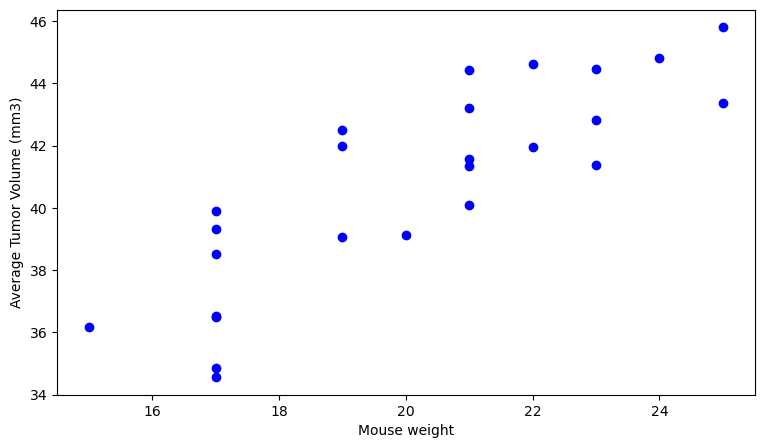

In [63]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

#Group data by mouse ID
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

#Scatter plot graph

plt.figure(figsize=(9, 5))
plt.scatter(mouse_weight, average_tumor_volume, marker='o', color='blue')
plt.xlabel('Mouse weight')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


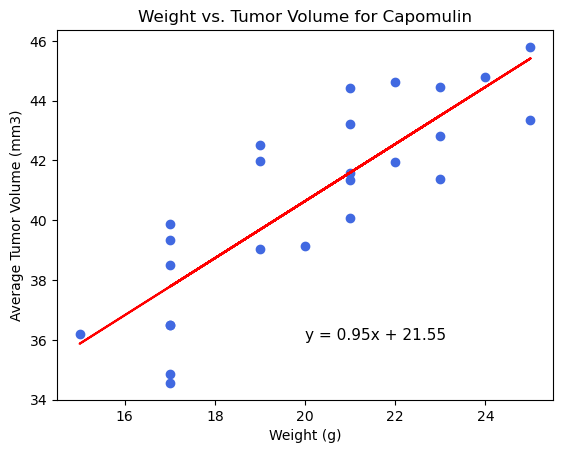

In [71]:
# Calculate the correlation coefficient and a linear regression model 
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']
#calculate the correlation coefficient 
avg_capm_vol = capomulin_data.groupby('Mouse ID').agg({
    'Tumor Volume (mm3)': 'mean',
    'Weight (g)': 'mean'
}).reset_index()

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient = st.pearsonr(avg_capm_vol['Weight (g)'], avg_capm_vol['Tumor Volume (mm3)']) 
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation_coefficient[0], 2)}")

# Create a linear regression model
slope, intercept, rvalue, pvalue, stderr = st.linregress(avg_capm_vol['Weight (g)'], avg_capm_vol['Tumor Volume (mm3)'])

# Calculate the predicted tumor volume using the regression model
regress_values = avg_capm_vol['Weight (g)'] * slope + intercept

# Create the equation of the regression line
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Plot the scatter plot with the regression line
plt.scatter(avg_capm_vol['Weight (g)'], avg_capm_vol['Tumor Volume (mm3)'], color='royalblue')
plt.plot(avg_capm_vol['Weight (g)'], regress_values, color='red')
plt.annotate(line_eq, (20, 36), fontsize=11)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs. Tumor Volume for Capomulin")

# Show the plot
plt.show()